In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['axes.grid']=True

# Lista 7 (4 pkt.) Termin: 7.01.2021r.

## Zadanie 1 (1 pkt.)

Narysuj krzywą eliptyczną określoną równaniem
$$y^2=x^3-x+1$$
nad ciałem $\mathbb{R}$.

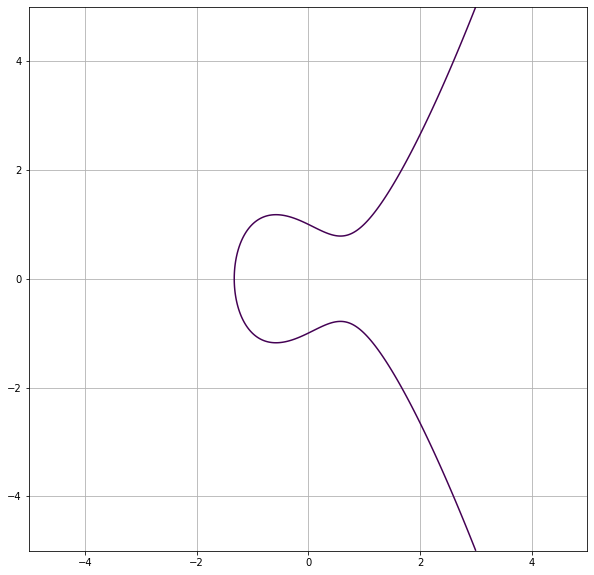

In [2]:
X = np.arange(-5,5,0.01)
Y = np.arange(-5,5,0.01)

X, Y= np.meshgrid(X,Y)
Z = Y**2-X**3+X-1

plt.contour(X, Y, Z, [0])
plt.show()

## Zadanie 2 (3 pkt.)

Narysuj krzywą z poprzedniego zadania i zaznacz na niej punkty $P$ i $Q$ o współrzędnych:

In [1]:
def fun(x):    
    a = (-0.5/-1.2625511274071601)
    return a*x +1
print(fun(-1.2625511274071601))
print(fun(0))

0.3960235662113943
0.5
0.3960235662113943
1.0


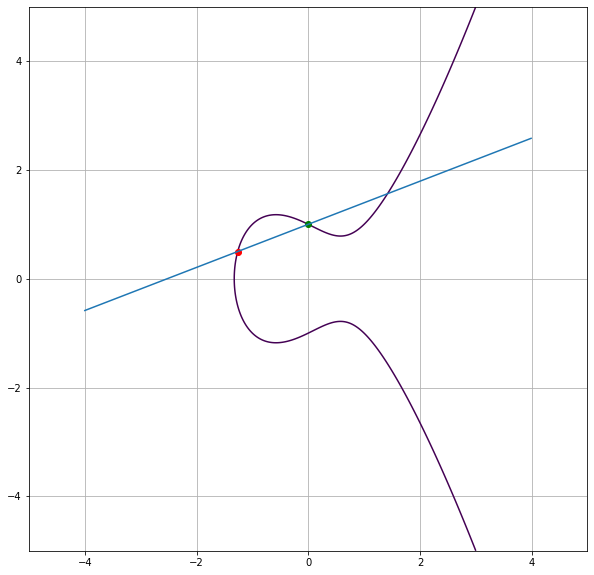

In [4]:
P=[-1.2625511274071601, 0.5] #red
Q=[0,1] #green

plt.contour(X, Y, Z, [0])
plt.plot(-1.2625511274071601, 0.5,'ro') 
plt.plot(0, 1, "go")

n = np.arange(-4.0, 4.0, 0.01)
s = fun(n)
plt.plot(n, s)

następnie narysuj linię przechodzącą przez te punkty. Napisz funkcję $\textit{add_minus(P,Q)}$, która przyjmuje współrzędne punktów $P$ i $Q$ oraz zwraca wspólrzędne punktu $R$ takiego, że $P+Q+R=0$, czyli punktu na przecięciu prostej przechodzącej przez $P$ i $Q$ z krzywą.

Dla krzywej eliptycznej zadanej równaniem:
$$y^2=x^3+ax+b$$
współrzędne punktu $R$ są zadane wzorami:
$$x_R=s^2-x_P-x_Q$$
$$y_R=y_P+s(x_R-x_P)$$
gdzie
$s=\frac{y_P-y_Q}{x_P-x_Q}$ dla $P\neq Q$

oraz

$s=\frac{3x_P^2+a}{2y_P}$ dla $P=Q$

Uwaga: w $s$ może pojawić się dzielenie przez $0$ co oznacza, że współrzędne $x_R$ i $y_R$ będą współrzędnymi punktu w nieskończoności, który  w ramach definicji jest elementem neutralnym grupy.

Narysuj na poprzednim obrazku punkt $R$ i zobacz, że jest na przecięciu się prostej i krzywej.

Napisz funkcję $\textit{inv(P)}$ zwracającą współrzędne punktu będącego przeciwieństwem (elementem odwrotnym w grupie) punktu $P=(x_P,y_P)$, element przeciwny jest zdefiniowany jako:
$$-P=(x_P,-y_P)$$.

Funkcja $\textit{add_minus(P,Q)}$ zwraca $R$ takie, że $P+Q+R=0$, czyli $R=-(P+Q)$, korzystając z $\textit{inv}$, napisz funkcję $\textit{add(P,Q)}$, która zwraca $P+Q$.

Narysuj punkt $P+Q$ i zobacz, że jest odbiciem punktu $R=-(P+Q)$ względem osi $x$.

In [5]:
def add_minus(P,Q):
    a = -1
    s = None
    if(P == Q):
        s = (3*P[0]**2+a)/(2*P[1])
    else:
        s = (P[1]-Q[1])/(P[0]-Q[0])
    RX = s**2-P[0]-Q[0]
    RY = P[1] + s*(RX - P[0])
    return [RX, RY]

In [6]:
def inv(P):
    return[P[0], -P[1]]

In [7]:
def add(P,Q):
    return inv(add_minus(P,Q))

In [8]:
print(add_minus(P,Q)==[1.4193857924019508, 1.5621102233368063])
print(inv(P)==[-1.2625511274071601, -0.5])
print(add(P,Q)==[1.4193857924019508, -1.5621102233368063])

True
True
True
